### Importing Needed packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the Data in
The last 5 years given by Yahoo Finance are from 09/11/2017 to Present(29/12/2021)

In [3]:
df = pd.read_csv("btc-usd.csv")

# take a look at the dataset
print(df.shape)
df.head(10)

(1512, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920
5,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3197110016
6,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4200880128
7,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5123809792
8,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4651670016
9,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3667190016


In [4]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1502,2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129
1503,2021-12-21,46886.078125,49300.917969,46698.773438,48936.613281,48936.613281,27055803928
1504,2021-12-22,48937.097656,49544.796875,48450.941406,48628.511719,48628.511719,24447979559
1505,2021-12-23,48626.343750,51332.339844,48065.835938,50784.539063,50784.539063,28223878108
1506,2021-12-24,50806.050781,51814.027344,50514.496094,50822.195313,50822.195313,24367912228
1507,2021-12-25,50854.917969,51176.597656,50236.707031,50429.859375,50429.859375,19030650914
1508,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926
1509,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
1510,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
1511,2021-12-29,47576.855469,48101.585938,46730.207031,46854.156250,46854.156250,30502799360


Let's see how many null values there are in the dataset

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data exploration
Let's first have a descriptive exploration on our data.

In [6]:
# summarize the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1.512000e+03
mean,18101.446503,18597.082311,17554.108072,18124.472277,18124.472277,2.518535e+10
std,17472.373752,17956.076011,16915.371732,17480.093327,17480.093327,2.102946e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7177.894897,7320.137085,6936.347412,7173.735962,7173.735962,7.700077e+09
50%,9511.579102,9682.253907,9302.726074,9514.672851,9514.672851,2.113411e+10
75%,20052.415039,21903.831543,19782.406250,21683.718750,21683.718750,3.579627e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Let's select some of these features to explore more, as Close and Adj Close in our dataset are the same 1:1

In [7]:
cdf = df[['Open','High','Low','Close']]
cdf.head(8)

,Open,High,Low,Close
0,7446.830078,7446.830078,7101.520020,7143.580078
1,7173.729980,7312.000000,6436.870117,6618.140137
2,6618.609863,6873.149902,6204.220215,6357.600098
3,6295.450195,6625.049805,5519.009766,5950.069824
4,5938.250000,6811.189941,5844.290039,6559.490234
5,6561.479980,6764.979980,6461.750000,6635.750000
6,6634.759766,7342.250000,6634.759766,7315.540039
7,7323.240234,7967.379883,7176.580078,7871.689941


Let's plot each of these features:

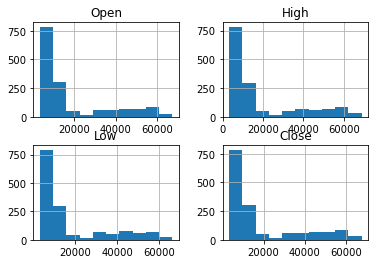

In [8]:
viz = cdf[['Open','High','Low','Close']]
viz.hist()
plt.show()

Now, let's plot each of them against the Close, to see how linear their relationship is:

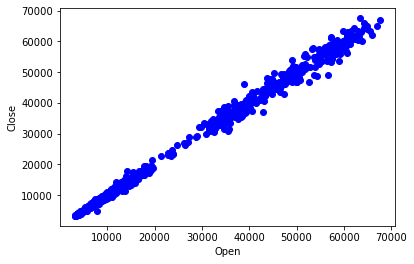

In [9]:
plt.scatter(cdf.Open, cdf.Close, color='blue')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

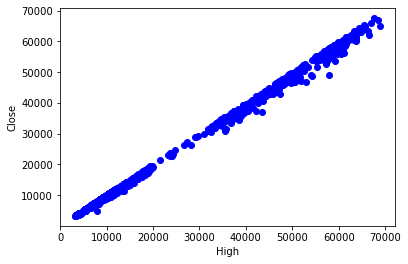

In [10]:
plt.scatter(cdf.High, cdf.Close, color='blue')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

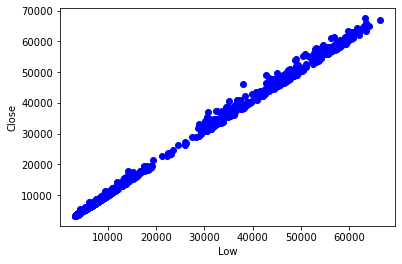

In [11]:
plt.scatter(cdf.Low, cdf.Close, color='blue')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

<AxesSubplot:>

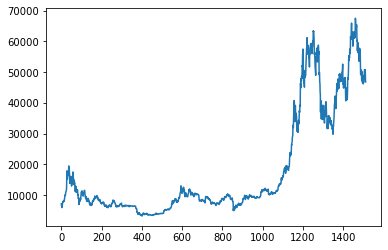

In [12]:
df['Close'].plot()

### Filter Method
Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable Close. The correlation coefficient has values between -1 to 1
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

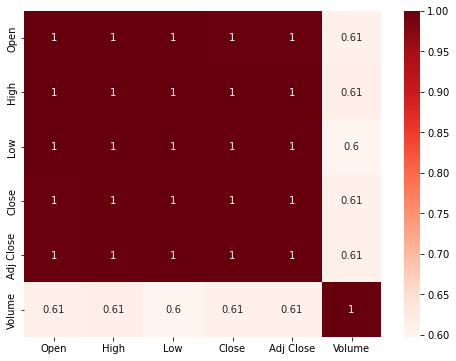

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Open         0.998331
High         0.999278
Low          0.999135
Close        1.000000
Adj Close    1.000000
Volume       0.607153
Name: Close, dtype: float64

### Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for the testing. We create a mask to select random rows using np.random.rand() function:

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Multiple Linear Regression Model

In [16]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Open','High','Low']])
y = np.asanyarray(train[['Close']])
regr.fit(x,y) # fit linear model

# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)

Coefficients:  [[-0.55528022  0.93417763  0.6149451 ]]
Intercept:  [5.66709958]


### Prediction
Residual sum of squares: $$RSS = \sum_{i=1}^{n} (y-\hat{y})^2$$

In [20]:
y_predicted = regr.predict(test[['Open','High','Low']])
x = np.asanyarray(test[['Open','High','Low']])
y = np.asanyarray(test[['Close']])

# Residual Sum of Squares
print("Residual sum of squares: " , np.mean((y_predicted - y) ** 2))
# Explained variance score: 1 is perfect prediction
print("Variance score: ", regr.score(x,y))

print()
# Root Mean Squared Error
rmse = mean_squared_error(y, y_predicted,squared=False)
r2 = r2_score(y, y_predicted)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Residual sum of squares:  172166.25263400472
Variance score:  0.9994055783470822

Root mean squared error:  414.9292140040331
R2 score:  0.9994055783470822


C:\Users\Johnny\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.

### Comparing Predicted vs True Close Value - Multiple Regression Model

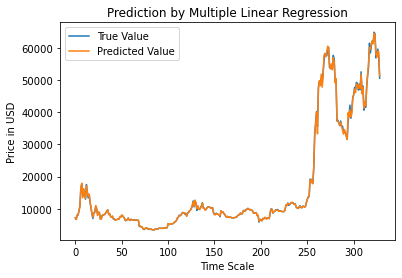

In [18]:
# Predicted vs Close value
plt.plot(y, label='True Value')
plt.plot(y_predicted, label='Predicted Value')
plt.title('Prediction by Multiple Linear Regression')
plt.xlabel('Time Scale')
plt.ylabel('Price in USD')
plt.legend()
plt.show()